In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/data.csv", encoding='latin1')

print(df.columns)

x = df['no2'].dropna().values.astype(float)

print("Total samples:", len(x))


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
Total samples: 419509


/tmp/ipython-input-4213399038.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding='latin1')


In [4]:
r = 102303245
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

z = x + ar * np.sin(br * x)

print("ar =", ar)
print("br =", br)

ar = 0.1
br = 0.3


In [5]:
mu = np.mean(z)
var = np.mean((z - mu)**2)

lam = 1 / (2 * var)
c = np.sqrt(lam / np.pi)

print("\nEstimated Parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)



Estimated Parameters:
mu = 25.8061973060051
lambda = 0.0014603318694384995
c = 0.021560103690648872


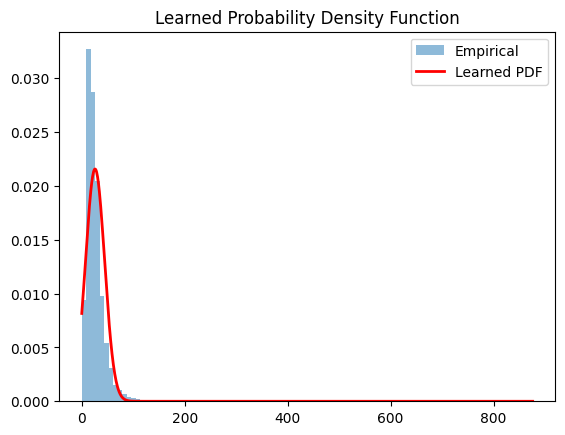

In [7]:
import matplotlib.pyplot as plt

plt.hist(z, bins=100, density=True, alpha=0.5, label="Empirical")

grid = np.linspace(min(z), max(z), 1000)
pdf = c * np.exp(-lam * (grid - mu)**2)

plt.plot(grid, pdf, 'r', linewidth=2, label="Learned PDF")
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()